## Day 33: Website Data Analysis 

For this challenge, you will analyze data using the pandas, 
Matplotlib, and Seaborn libraries. You are going to use the 
website_data_analysis CSV file.

1. Using pandas, import the website_data_analysis dataset 
and find the average number of visits per website. 


In [1]:
import pandas as pd 

df = pd.read_csv("website_data_analysis.csv")
df.head()

,website,visits,bounce_rate,conversion_rate,days_of_week,unique_visitors,referral_source,revenue
0,boss.com,5000,20,3.0,Monday,3000,Google,1000
1,python.com,3500,25,2.0,Tuesday,2800,Facebook,800
2,wild.com,6000,15,4.0,Wednesday,3900,Twitter,1200
3,cat.com,4500,30,1.5,Thursday,3500,Instagram,700
4,kit.com,5500,18,3.5,Friday,3700,Yahoo,1000


In [6]:
# finding the average number of visits per website

avg_visit = df.groupby("website")["visits"].mean()
avg_visit

website
Childcare.net         1400.0
CodeCrushers.org      2900.0
CraftyCorner.com      3000.0
FinFit.net            3400.0
FoodieFrenzy.com      3200.0
Garden.com            1300.0
GoldSales.com         1200.0
HealthHQ.net          2500.0
Love.net              3400.0
MindMelders.net       2600.0
MusicMaven.com        3100.0
ScribeMind.com        3200.0
SmartGardeners.net    2700.0
TravelCove.net        2800.0
boss.com              4500.0
cat.com               4500.0
kit.com               5500.0
python.com            3500.0
wild.com              5050.5
Name: visits, dtype: float64

2. Add another column to the DataFrame that calculates the 
number of website visits per unique visitor. 


In [17]:
# Views per uniquee visitor
df["views_per_unique_visit"] = df["visits"] / df["unique_visitors"]
df.head()

,website,visits,bounce_rate,conversion_rate,days_of_week,unique_visitors,referral_source,revenue,views_per_unique_visit
0,boss.com,5000,20,3.0,Monday,3000,Google,1000,1.666667
1,python.com,3500,25,2.0,Tuesday,2800,Facebook,800,1.250000
2,wild.com,6000,15,4.0,Wednesday,3900,Twitter,1200,1.538462
3,cat.com,4500,30,1.5,Thursday,3500,Instagram,700,1.285714
4,kit.com,5500,18,3.5,Friday,3700,Yahoo,1000,1.486486


3. Using Matplotlib, create a bar plot to visualize the top 5 
websites with the highest number of page views. The data 
plotted must be sorted in descending order. 


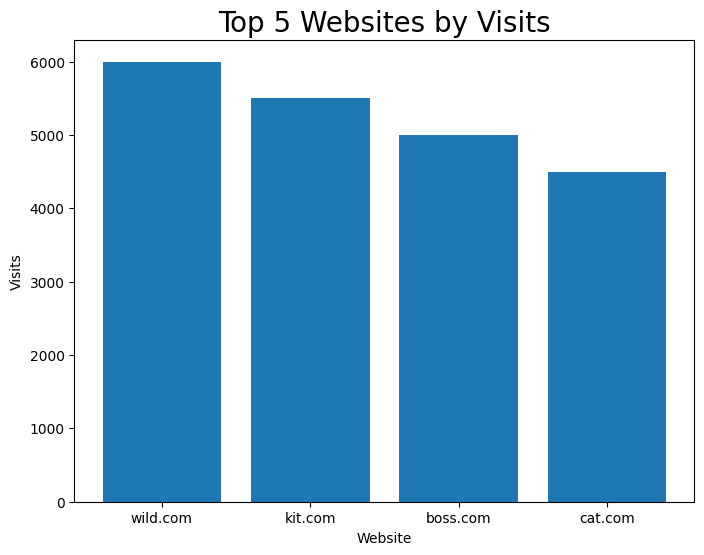

In [51]:
import matplotlib.pyplot as plt

# sorting top 5 website by views
top_5 = df.sort_values(by="visits", ascending=False).head(5)

plt.figure(figsize=(8, 6))
plt.bar(top_5["website"], top_5["visits"])
plt.xlabel("Website")
plt.ylabel("Visits")
plt.title("Top 5 Websites by Visits", fontsize=20)
plt.show()


4. Using pandas, calculate the average bounce rate for each 
day of the week. Retrieve the day with the highest average 
bounce rate and its rate. 


In [36]:
weekly_bounce_rate = df.groupby("days_of_week")["bounce_rate"].mean()
weekly_bounce_rate

days_of_week
Friday       15.666667
Monday       21.333333
Saturday     16.000000
Sunday       18.333333
Thursday     20.666667
Tuesday      18.000000
Wednesday    13.666667
Name: bounce_rate, dtype: float64

In [37]:
max_bounce_rate = weekly_bounce_rate.sort_values(ascending=False)

# retrieving the max bouncing rate
max_rate = max_bounce_rate.head(1).iloc[0]

# retrieving the day with max bouncing rate
max_day = max_bounce_rate.index[0]
print(f"The day with max rate is {max_day} and rate is {max_rate:.2f}")

The day with max rate is Monday and rate is 21.33


5. Using Seaborn, create a line plot to show the trend of 
unique visitors over time. Group the data by the day of the 
week. 


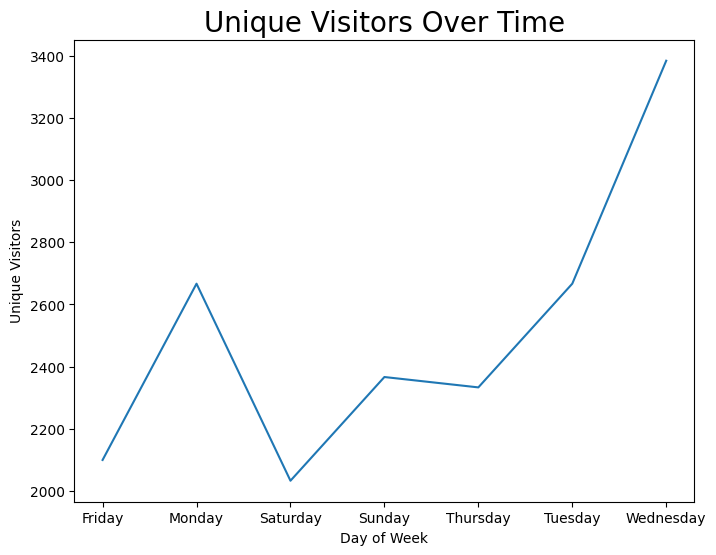

In [54]:
import seaborn as sns

# Group data by days of the week 
df_group = df.groupby("days_of_week")["unique_visitors"].mean()

# Plot the data
plt.figure(figsize = (8, 6))
sns.lineplot(x = df_group.index, y=df_group)
plt.xlabel("Day of Week")
plt.ylabel("Unique Visitors")
plt.title("Unique Visitors Over Time", fontsize = 20)
plt.show()

6. Using pandas, group the data by "day_of_week" and 
"referral_source" columns and find the average  of the 
visits and revenue for each group. 


In [44]:
days_referral = df.groupby(["days_of_week", "referral_source"])[["visits", "revenue"]].mean()
days_referral.head()

visits  revenue
days_of_week referral_source                 
Friday       Instagram        2100.0   1450.0
             Yahoo            5500.0   1000.0
Monday       Google           5000.0   1000.0
             Instagram        2600.0    700.0
             Reddit           3200.0    900.0

7. Using pandas, calculate the revenue rate for each referral 
source and create a pie chart to visualize the breakdown of 
revenue rate by referral source. Which referral source 
brought it the most revenue?

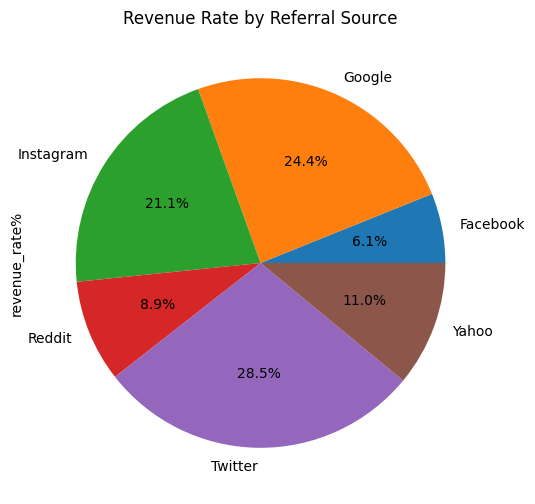

In [49]:
# Creating a new column for revenue per referral souce 

df["revenue_rate%"] = (df["revenue"]/(sum(df["revenue"]))) * 100

# Grouping data revenue % by referral source and suming it up
revenue_rate = df.groupby(["referral_source"])["revenue_rate%"].sum()


# plotting with pandas and matplotlib
plt.figure(figsize=(8,6))
revenue_rate.plot.pie(autopct="%.1f%%")
plt.title("Revenue Rate by Referral Source", fontsize = 12)
plt.show()